In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# 선형회귀모델
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

단순 선형 회귀분석

In [10]:
path = 'https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv'
df = pd.read_csv(path)

In [11]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [12]:
df.shape

(398, 7)

In [13]:
#결측치 유무 확인 
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      2
weight          0
acceleration    0
model-year      0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [15]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model-year'],
      dtype='object')

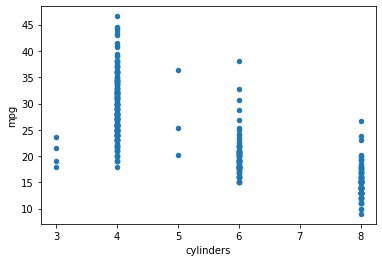

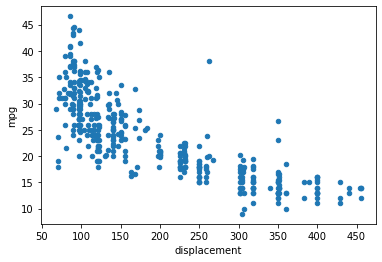

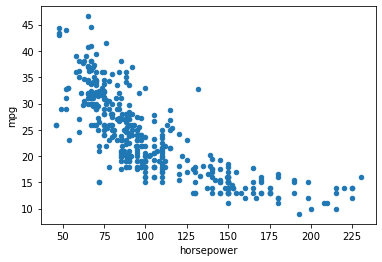

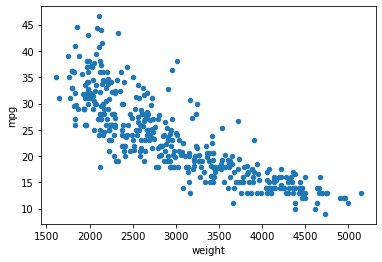

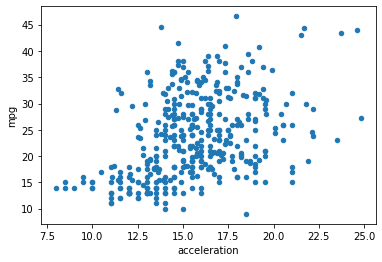

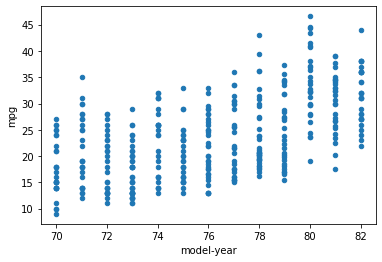

In [17]:
#상관이 있다고 해서 인과관계가 있다고 말할 수 없다. 
# >> 단, 인과관계가 있다고 하면 (회귀분석이 가능) >> 반드시 상관관계 

# 종속변수 (mpg >> km/1 연비)
df.plot(kind='scatter', x='cylinders', y='mpg')
plt.show()
df.plot(kind='scatter', x='displacement', y='mpg')
plt.show()
df.plot(kind='scatter', x='horsepower', y='mpg')
plt.show()
df.plot(kind='scatter', x='weight', y='mpg')
plt.show()
df.plot(kind='scatter', x='acceleration', y='mpg')
plt.show()
df.plot(kind='scatter', x='model-year', y='mpg')
plt.show()



In [19]:
#결측치 처리 
#결측값이 있는 행 전체 제거 (axis=1 >> 열 제거)
df.dropna(axis=0, inplace=True)

In [20]:
# weight-mpg 분석 
x = df[['weight']] #독립변수
y = df['mpg'] # 종속변수 

 

In [21]:
x_train, x_test, y_train, y_test = \
train_test_split(x,y, test_size=0.2, random_state=42)

In [22]:
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(316, 1)
(80, 1)
(316,)
(80,)


In [23]:
#선형 회귀 객체 생성 LinearRegression 
lr = LinearRegression()
lr.fit(x_train, y_train) # 학습 수행

LinearRegression()

In [24]:
# 회귀식의 기울기 (w 가중치) 와 y절편 (bias)
print('가중치 w : ', lr.coef_)

가중치 w :  [-0.00795094]


In [25]:
print('bias : ', lr.intercept_)

bias :  47.30893759102081


In [26]:
# 예측 수행 
y_pred = lr.predict(x_test)

In [27]:
y_pred

array([29.90433724, 30.33368782, 19.20237649, 31.76485642, 25.1258243 ,
       16.77734081,  9.57379219, 33.35504375, 20.02132297, 32.46453884,
       16.69783144, 15.06788943, 30.53246123, 26.70010976, 24.1717119 ,
       30.41319718, 22.64513206, 26.43772885, 30.17466908, 29.10129263,
       24.78393403, 30.3734425 , 26.01632921, 19.44885553, 29.02178327,
       29.30006605, 23.62309727, 19.96566641, 31.8046111 , 27.34413563,
       10.28142555, 18.52654687, 31.60583768, 21.62741217, 11.81595633,
       16.30028461, 10.43249335, 30.40524625, 13.16761556, 10.61536489,
       14.72599915, 21.46839344, 14.19328639, 21.82618559, 29.6578582 ,
        9.6612525 , 21.21396347, 25.8414086 , 28.21873866, 18.89228996,
       14.2807467 , 29.19670387, 29.30801699, 25.04631494, 24.76803215,
       18.43113563, 31.04927212, 19.91796079, 28.42546302, 29.59425071,
        7.94385018, 31.90797328, 16.24462805, 24.01269317, 28.18693492,
       17.61218916, 28.78325517, 23.79801788, 23.58334259, 12.79

In [28]:
#모델 성능평가 (test_dataset)
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.6205049942063272


In [29]:
# 학습 데이터셋의 모델 성능과 비교 
pred_train = lr.predict(x_train)
score_train = r2_score(y_train, pred_train)
print(score_train)

0.705422183951529


In [30]:
# 추가 분석(상관분석에서 상관관계(특성)를 보이는 개별변수와 종속변수 회귀분석 진행)

In [31]:
corr = df.corr(method='pearson')
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
mpg,1.000000,-0.775680,-0.804711,-0.777575,-0.832725,0.421159,0.581144
cylinders,-0.775680,1.000000,0.950706,0.843751,0.896058,-0.504844,-0.352554
displacement,-0.804711,0.950706,1.000000,0.897787,0.932729,-0.542713,-0.374620
horsepower,-0.777575,0.843751,0.897787,1.000000,0.864350,-0.687241,-0.420697
weight,-0.832725,0.896058,0.932729,0.864350,1.000000,-0.415462,-0.311774
acceleration,0.421159,-0.504844,-0.542713,-0.687241,-0.415462,1.000000,0.294588
model-year,0.581144,-0.352554,-0.374620,-0.420697,-0.311774,0.294588,1.000000


다중 선형 회귀 분석

In [32]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'

df = pd.read_csv(path)

In [33]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [34]:
df.shape

(20640, 10)

In [35]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [37]:
# 결측치 있는 행 전체 제거 
df.dropna(axis=0, inplace=True)

In [38]:
# ocean_proximity : 범주형 데이터 >> 분석에서 제외
df['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [39]:
df.drop('ocean_proximity', axis=1, inplace=True)

In [40]:
df[:3]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0


In [41]:
#변수들간 상관관계 
corr = df.corr(method='pearson')
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


In [42]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [43]:
#종속 변수 median_house_value
x = df.drop('median_house_value', axis=1) # 종속변수를 제외한 나머지 독립변수 
y = df['median_house_value']

In [44]:
# 분석 데이터 셋 분할 (7:3)
x_train, x_test, y_train, y_test =\
train_test_split(x, y, test_size=0.3, random_state=42)

In [45]:
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(14303, 8)
(6130, 8)
(14303,)
(6130,)


In [46]:
# LinearRegression 객체 생성
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [47]:
# 회귀식 기울기, y절편
lr.coef_ # 회귀계수

array([-4.21262308e+04, -4.20623763e+04,  1.18784999e+03, -8.57874086e+00,
        1.18123421e+02, -3.55751755e+01,  3.73676747e+01,  4.03297253e+04])

In [48]:
lr.intercept_

-3530241.3077969123

In [49]:
#예측 수행 
y_pred = lr.predict(x_test)
y_pred

array([196980.02029312, 158095.83507496, 203028.20805884, ...,
       146710.62625887,  13392.05741171,  95881.80878574])

In [50]:
#모델 성능 평가 
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
score
# 결과 해석 : 0.6445
# >> # 모델의 설명력이 0.6445로 테스트 정확도가 64.45% 이상임

0.6445130291082346

In [51]:
# 모델 비교 (의사결정나무)
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=3, random_state=42)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [52]:
y_pred = dtr.predict(x_test)

In [53]:
#모델 성능 평가 (mean_squared_error)
from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(mse)

6793101269.876856


In [54]:
# 모델 비교 (랜덤포레스트)
from sklearn.ensemble import RandomForestRegressor

In [55]:
rf = RandomForestRegressor(max_depth=3, random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, random_state=42)

In [56]:
pred = rf.predict(x_test)
pred

array([185613.12090302, 200380.41589374, 202368.90900627, ...,
       199257.87619654, 118624.34177765, 118624.34177765])

In [57]:
mse = mean_squared_error(y_test, y_pred)
mse

6793101269.876856

In [58]:
score = r2_score(y_test, pred)
print(score)

0.5163257607399465


In [59]:
# 학습이 완료된 rf 객체에 학습 데이터 셋으로 예측 수행
pred_train = rf.predict(x_train)
mse_train = mean_squared_error(y_train, pred_train)
print(mse_train)

6342421033.759215


In [60]:
score = r2_score(y_train, pred_train)
print(score)

0.5238959090558103


In [61]:
# mse 결과 해석하는 방법
# mse 결과 그대로 적시. mse 가 다소 높게 나옴

# r2_score 51.63% 이어서 정확도가 낮으며, mse가 6447828605로 높음
# mse의 mse_train(6342421033)과 비교 / 모델 간 성능 비교
# 모델간 성능비교시, rf 모형 6447828605, dtr 모형 6793101269 으로 예측력이 개선되었음을 확인

# cf r2_score 95% 이상, mse 2000 (mse_train 1800) 일 경우,
# 본 모델은 설명력이 95% 이상으로 정확도가 우수하고, mse 가 안정적이며,
# 타 모델과 비교시, 예측력이 개선되었음이 확인 되었음.
# mse 종속변수와 비교해서 설명해야 함 (기준)
# 예) 종속변수 평균 1000 mse 10 작은 오차 / 평균 100 mse 10 큰 오차 (상대적 비교)
# 산업기준(baseline) 모델과 비교 / 적어도 3개 이상의 모델 간 성능 비교(정확도, mse/rmse/mae/mape 등)